# Identify:

Please fill-in your ID in the following cell, **only id numbers, no names!**


<div style="direction:rtl"> 
מלאו בתא הבא את מספר הת.ז שלכם. רק מספר ת.ז., ללא שמות!!  
</div>

In [1]:
id1 = "315022103"


<div style="direction:rtl"> 
מלאו בתא הבא את מספר השאלון 
</div>

In [2]:
 questionnaire = "3"

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

In [4]:
df = pd.DataFrame([id1])

In [5]:
df.to_clipboard(index=False,header=False)

---

----

In [6]:
url = 'https://raw.githubusercontent.com/nlihin/data-analytics/main/datasets/hotel_bookings.csv'
data = pd.read_csv(url)
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [7]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

# Q1 

<AxesSubplot:xlabel='count', ylabel='customer_type'>

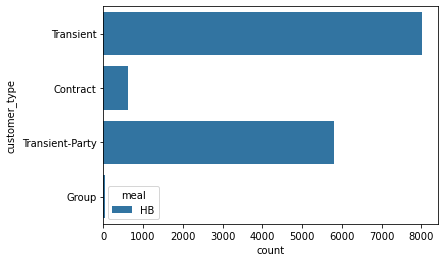

In [8]:
meal = data[data["meal"]=="HB"]
meal
sns.countplot(y='customer_type', hue= "meal" , data=meal)

 # Q2

In [18]:
data.groupby(['is_repeated_guest', 'customer_type'])['total_of_special_requests'].median().unstack()

customer_type,Contract,Group,Transient,Transient-Party
is_repeated_guest,,,,
0,0,0,0,0
1,1,1,0,0


# Q3

In [10]:
country_new=data["country"].dropna()
data_new=data
data_new["country"]=country_new
data_new_365=data_new[data_new["lead_time"]>365]
data_new_365.head(4)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
81,Resort Hotel,1,368,2015,July,27,3,3,7,2,...,No Deposit,40.0,NaN,0,Contract,55.68,0,0,Canceled,2015-05-19
225,Resort Hotel,0,394,2015,July,28,8,2,5,2,...,No Deposit,40.0,NaN,0,Contract,89.68,0,0,Check-Out,2015-07-15
245,Resort Hotel,0,366,2015,July,28,9,2,5,2,...,No Deposit,40.0,NaN,0,Contract,134.73,0,0,Check-Out,2015-07-16


In [11]:
data_new_365.shape[0]

3148

In [12]:
pd.pivot_table(data_new_365,values="lead_time", index="country").reset_index()

,country,lead_time
0,AUS,438.000000
1,AUT,433.285714
2,BEL,392.500000
3,CHE,403.750000
4,CN,403.500000
5,DEU,408.225734
6,DNK,405.000000
7,ESP,367.000000
8,FRA,435.033333
9,GBR,432.258824


# Q4

<Figure size 720x1080 with 0 Axes>

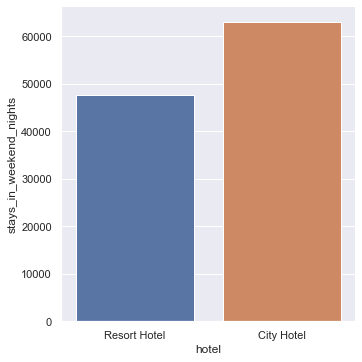

In [13]:
sns.set(style='darkgrid')
plt.figure(figsize=(10,15)) 
sns.catplot(x="hotel", y="stays_in_weekend_nights", kind="bar" , estimator = np.sum, data=data,ci=None)

# Q5

In [14]:
def get_acc(max_depth, train_X, test_X, train_y, test_y):
    model = sk.tree.DecisionTreeClassifier(criterion="gini", max_depth=max_depth, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(test_X)
    acc = sk.metrics.accuracy_score(preds_val, test_y)
    return(acc)
features=["is_repeated_guest"  ,"previous_bookings_not_canceled" , "days_in_waiting_list"   , "lead_time"]
X = data[features]
y = data['customer_type']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)  
for max_depth in [1, 2, 3, 4, 5, 6 , 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 25,30]:
    my_acc = get_acc(max_depth, X_train, X_test, y_train, y_test)
    print(max_depth, my_acc)

1 0.7505653739844208
2 0.755842197839015
3 0.7568752268475863
4 0.7591646424882039
5 0.7592763212999414
6 0.760951503476003
7 0.7627942038696708
8 0.7650277801044197
9 0.7660328894100566
10 0.7684060641594773
11 0.7704721221766201
12 0.7706954798000949
13 0.7732082530641874
14 0.7744367199932992
15 0.776195661278164
20 0.7806628137476618
25 0.782310076220789
30 0.7831197476058854


בחרנו בעומק עץ 20 בגלל שרואים שאין שינויים משמעותיים בדיוק לאחר עומק זה ונרצה להמנע כמה שיותר מoverfittings

# Q6

<AxesSubplot:ylabel='Frequency'>

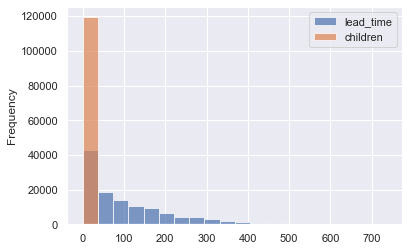

In [15]:
dataQ6=data[['lead_time','children']]
dataQ6.plot.hist(bins=20, alpha=0.7)

---
# GOOD LUCK !!!!
---

In [16]:
# do not type below this line